In [4]:
import pickle
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
import torch.nn as nn
import torch.optim as optim
from focal_loss.focal_loss import FocalLoss
from torch.utils.data import Dataset, DataLoader, TensorDataset, WeightedRandomSampler, RandomSampler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
#from autoencoder_utils import *
from joint_utils import *

In [5]:
with open('results/final_models/phi3_joint/metrics_data1.pkl', 'rb') as f:
    loaded_data = pickle.load(f)


# Access the lists

f1_scores = loaded_data['f1_scores']
auc_scores = loaded_data['auc_scores']
precisions = loaded_data['precisions']
recalls = loaded_data['recalls']
accuracies = loaded_data['accuracies']
matrices = loaded_data['matrices']
fpr_tpr = loaded_data['fpr_tpr']
roc_aucs = loaded_data['roc_aucs']

Class: Fracture
F1 score: 0.11624919717405266
AUC score: 0.5559486952675807
Precision: 0.9130434782608695
Recall: 0.06501547987616099
Accuracy: 0.11627906976744186



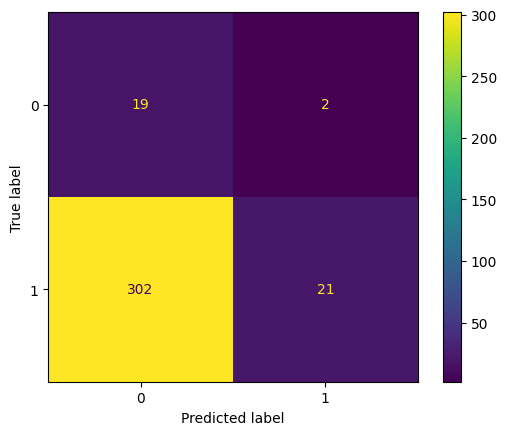

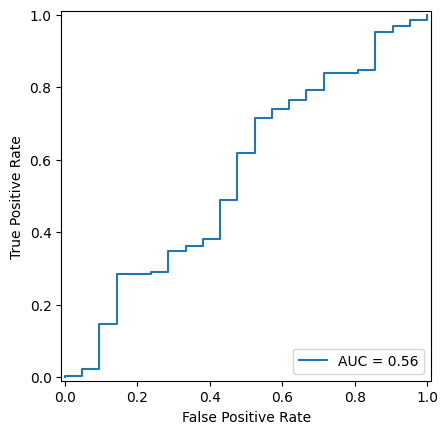

In [6]:
print('Class: Fracture')

print(f'F1 score: {f1_scores[0]}\n'
        f'AUC score: {auc_scores[0]}\n'
        f'Precision: {precisions[0]}\n'
        f'Recall: {recalls[0]}\n'
        f'Accuracy: {accuracies[0]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[0])
matrix.plot()

fpr, tpr = fpr_tpr[0]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[0])
roc_curve.plot()

Class: Lung Lesion
F1 score: 0.48348745046235136
AUC score: 0.5
Precision: 0.9384615384615385
Recall: 0.997275204359673
Accuracy: 0.9360613810741688



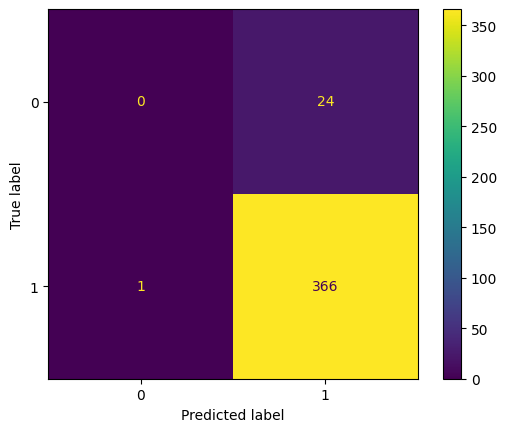

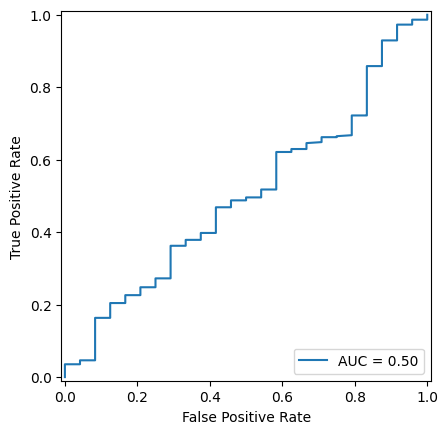

In [7]:
print('Class: Lung Lesion')
print(f'F1 score: {f1_scores[1]}\n'
        f'AUC score: {auc_scores[1]}\n'
        f'Precision: {precisions[1]}\n'
        f'Recall: {recalls[1]}\n'
        f'Accuracy: {accuracies[1]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[1])
matrix.plot()

fpr, tpr = fpr_tpr[1]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[1])
roc_curve.plot()

Class: Enlarged Cardiomediastinum
F1 score: 0.42450842696629215
AUC score: 0.5488477888702945
Precision: 0.7376449054301403
Recall: 1.0
Accuracy: 0.7376449054301403



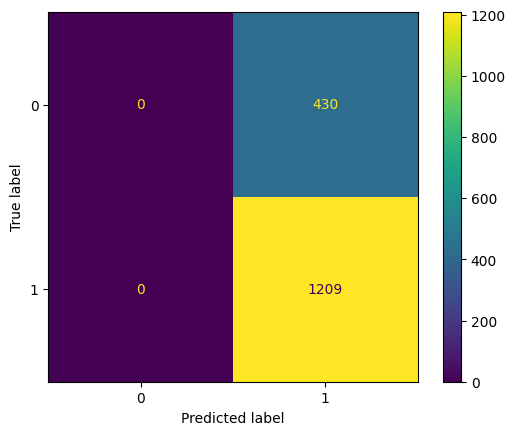

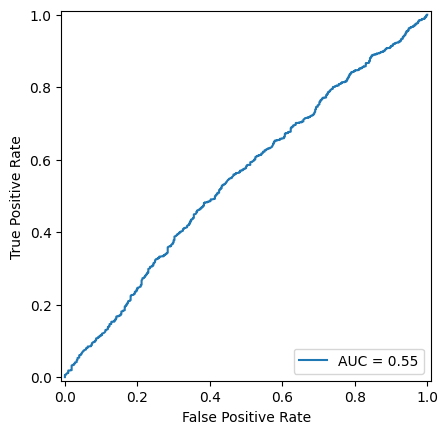

In [8]:
print('Class: Enlarged Cardiomediastinum')
print(f'F1 score: {f1_scores[2]}\n'
        f'AUC score: {auc_scores[2]}\n'
        f'Precision: {precisions[2]}\n'
        f'Recall: {recalls[2]}\n'
        f'Accuracy: {accuracies[2]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[2])
matrix.plot()

fpr, tpr = fpr_tpr[2]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[2])
roc_curve.plot()

Class: Consolidation
F1 score: 0.4713578614842913
AUC score: 0.5957359537814393
Precision: 0.8373093468908878
Recall: 0.990286771507863
Accuracy: 0.8310131477184841



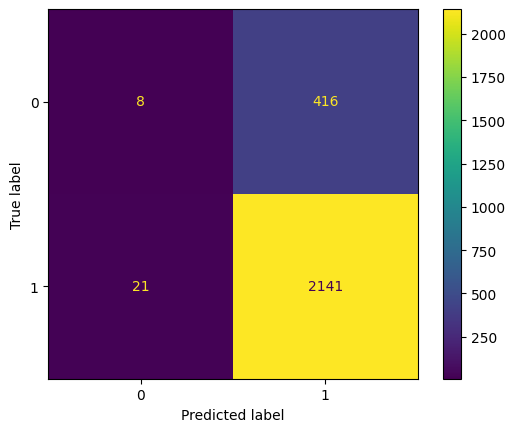

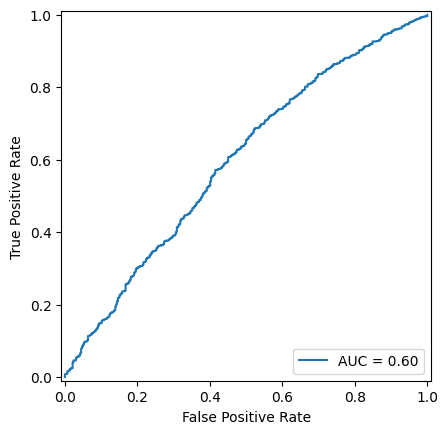

In [9]:
print('Class: Consolidation')
print(f'F1 score: {f1_scores[3]}\n'
        f'AUC score: {auc_scores[3]}\n'
        f'Precision: {precisions[3]}\n'
        f'Recall: {recalls[3]}\n'
        f'Accuracy: {accuracies[3]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[3])
matrix.plot()

fpr, tpr = fpr_tpr[3]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[3])
roc_curve.plot()

Class: Pneumonia
F1 score: 0.35517772735591663
AUC score: 0.5555556342723905
Precision: 0.5498409331919406
Recall: 0.9985556090515166
Accuracy: 0.5495233050847458



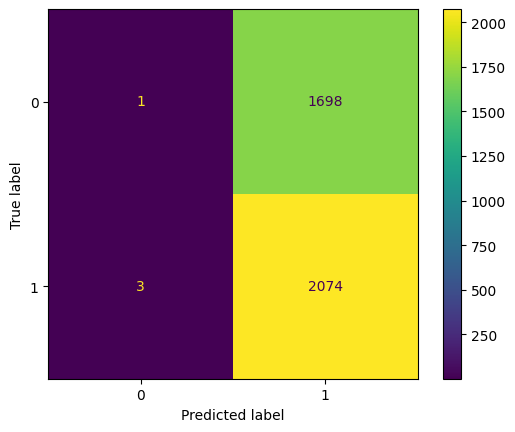

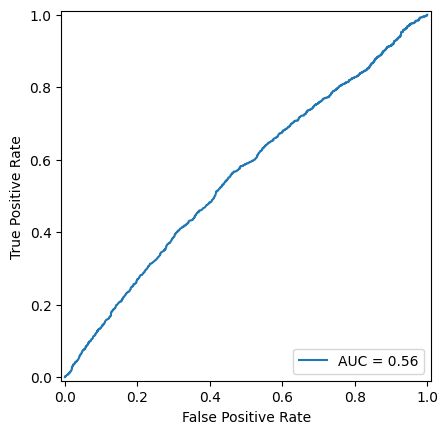

In [10]:
print('Class: Pneumonia')
print(f'F1 score: {f1_scores[4]}\n'
        f'AUC score: {auc_scores[4]}\n'
        f'Precision: {precisions[4]}\n'
        f'Recall: {recalls[4]}\n'
        f'Accuracy: {accuracies[4]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[4])
matrix.plot()

fpr, tpr = fpr_tpr[4]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[4])
roc_curve.plot()

Class: Atelectasis
F1 score: 0.49831559690337546
AUC score: 0.5154666351377679
Precision: 0.9760328389830508
Recall: 0.997563946406821
Accuracy: 0.9737154933298111



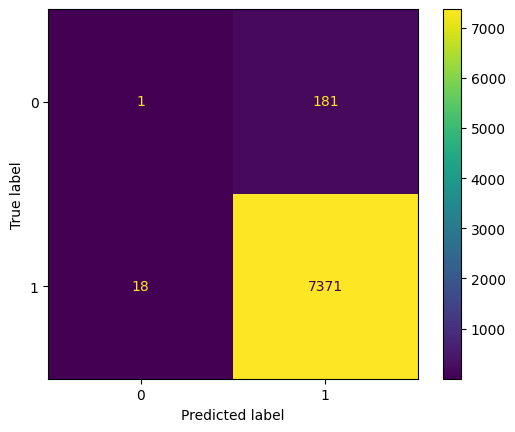

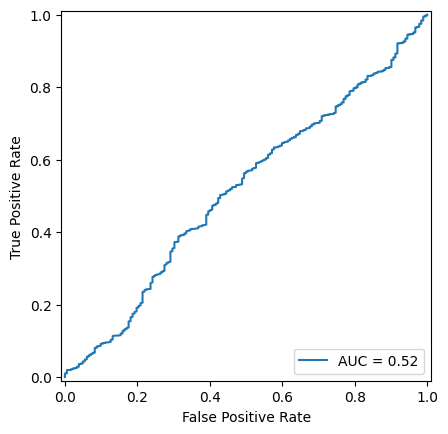

In [11]:
print('Class: Atelectasis')
print(f'F1 score: {f1_scores[5]}\n'
        f'AUC score: {auc_scores[5]}\n'
        f'Precision: {precisions[5]}\n'
        f'Recall: {recalls[5]}\n'
        f'Accuracy: {accuracies[5]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[5])
matrix.plot()

fpr, tpr = fpr_tpr[5]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[5])
roc_curve.plot()

Class: Lung Opacity
F1 score: 0.49047650872151305
AUC score: 0.5415082675405929
Precision: 0.9640089320898463
Recall: 0.9985034013605442
Accuracy: 0.9626180482686254



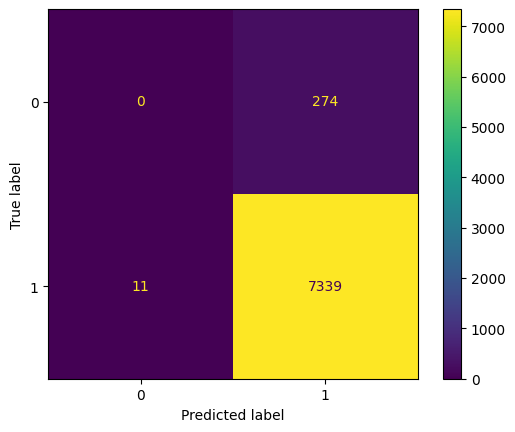

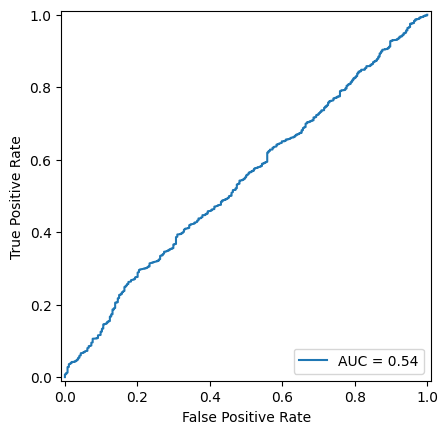

In [12]:
print('Class: Lung Opacity')
print(f'F1 score: {f1_scores[6]}\n'
        f'AUC score: {auc_scores[6]}\n'
        f'Precision: {precisions[6]}\n'
        f'Recall: {recalls[6]}\n'
        f'Accuracy: {accuracies[6]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[6])
matrix.plot()

fpr, tpr = fpr_tpr[6]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[6])
roc_curve.plot()

Class: Pneumothorax
F1 score: 0.15534255702023572
AUC score: 0.4720713359175139
Precision: 0.17837709959782352
Recall: 0.9986754966887417
Accuracy: 0.18104667609618105



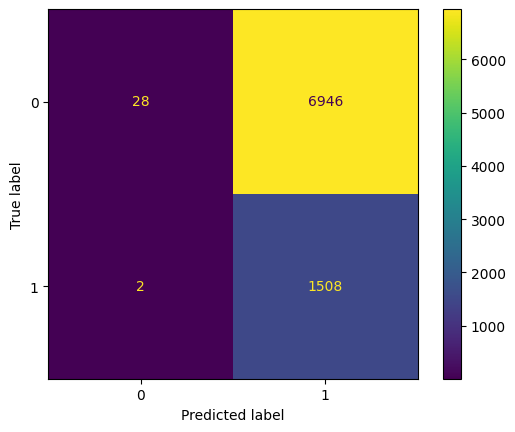

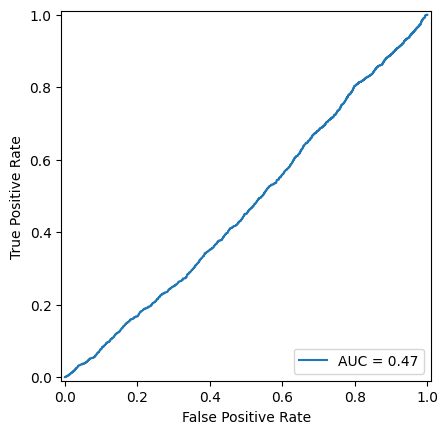

In [13]:
print('Class: Pneumothorax')
print(f'F1 score: {f1_scores[7]}\n'
        f'AUC score: {auc_scores[7]}\n'
        f'Precision: {precisions[7]}\n'
        f'Recall: {recalls[7]}\n'
        f'Accuracy: {accuracies[7]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[7])
matrix.plot()

fpr, tpr = fpr_tpr[7]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[7])
roc_curve.plot()

Class: Edema
F1 score: 0.38642973324658425
AUC score: 0.5596036945869066
Precision: 0.6292120435618194
Recall: 0.9991861648016277
Accuracy: 0.6289372599231754



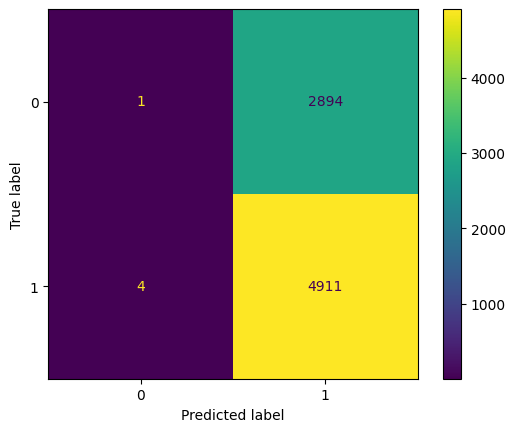

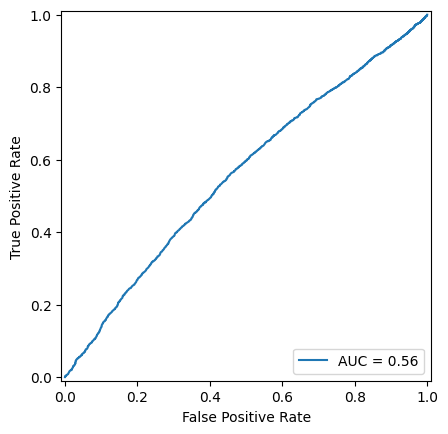

In [14]:
print('Class: Edema')
print(f'F1 score: {f1_scores[8]}\n'
        f'AUC score: {auc_scores[8]}\n'
        f'Precision: {precisions[8]}\n'
        f'Recall: {recalls[8]}\n'
        f'Accuracy: {accuracies[8]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[8])
matrix.plot()

fpr, tpr = fpr_tpr[8]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[8])
roc_curve.plot()

Class: Cardiomegaly
F1 score: 0.46121767114372536
AUC score: 0.5280001211071468
Precision: 0.8105783955707386
Recall: 0.9856754046698181
Accuracy: 0.8018101647714087



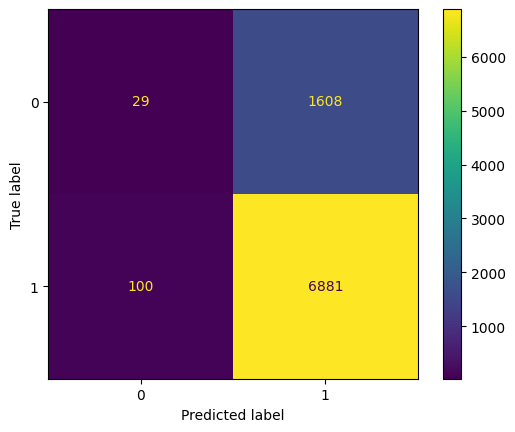

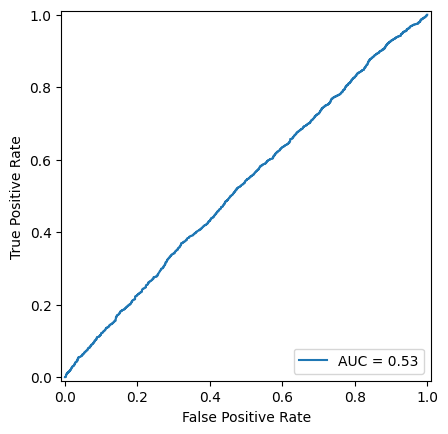

In [15]:
print('Class: Cardiomegaly')
print(f'F1 score: {f1_scores[9]}\n'
        f'AUC score: {auc_scores[9]}\n'
        f'Precision: {precisions[9]}\n'
        f'Recall: {recalls[9]}\n'
        f'Accuracy: {accuracies[9]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[9])
matrix.plot()

fpr, tpr = fpr_tpr[9]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[9])
roc_curve.plot()

Class: Length-of-Stay
F1 score: 0.08450096686462708
AUC score: 0.4907779923224058
Precision: 0.09110429447852761
Recall: 0.9990389235944258
Accuracy: 0.091931882852515



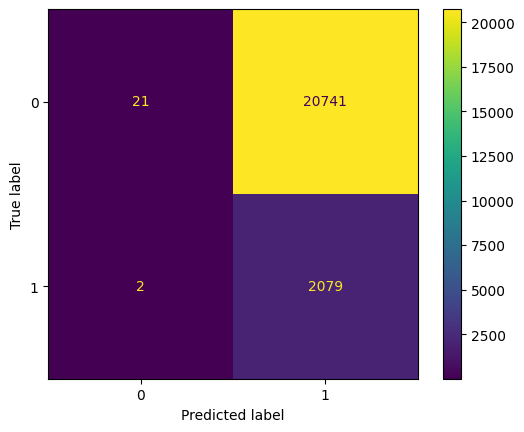

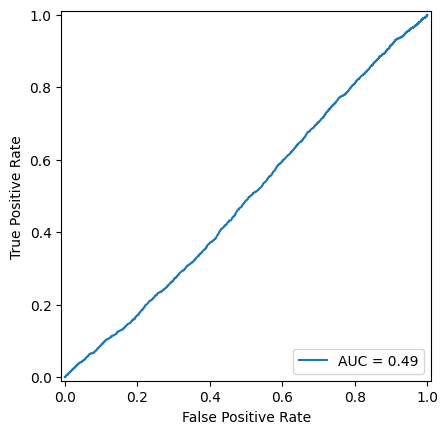

In [16]:
print('Class: Length-of-Stay')
print(f'F1 score: {f1_scores[10]}\n'
        f'AUC score: {auc_scores[10]}\n'
        f'Precision: {precisions[10]}\n'
        f'Recall: {recalls[10]}\n'
        f'Accuracy: {accuracies[10]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[10])
matrix.plot()

fpr, tpr = fpr_tpr[10]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[10])
roc_curve.plot()

Class: 48-hour Mortality
F1 score: 0.0369393272425667
AUC score: 0.5019220641991743
Precision: 0.020319044648427056
Recall: 0.9722814498933902
Accuracy: 0.036947861489296505



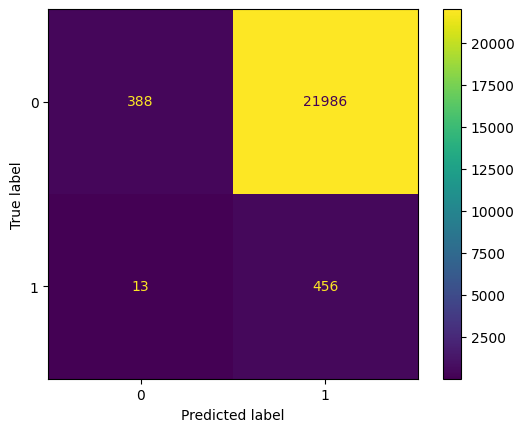

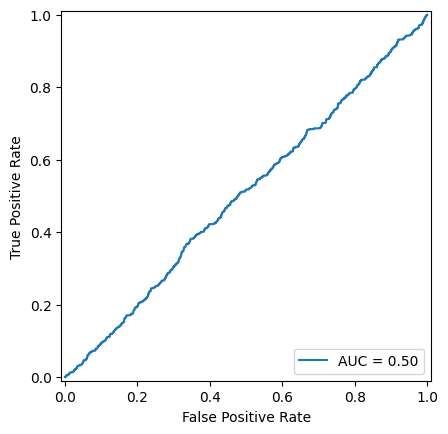

In [17]:
print('Class: 48-hour Mortality')
print(f'F1 score: {f1_scores[11]}\n'
        f'AUC score: {auc_scores[11]}\n'
        f'Precision: {precisions[11]}\n'
        f'Recall: {recalls[11]}\n'
        f'Accuracy: {accuracies[11]}\n')

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=matrices[11])
matrix.plot()

fpr, tpr = fpr_tpr[11]
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aucs[11])
roc_curve.plot()